This is an exercise notebook for selection of candidates in Centre for Computational Brain Research (CCBR), IIT Madras

##(c) 2024 CCBR

---

[Risan Raja ], [21f1000021@ds.study.iitm.ac.in], [BS/4th Year]

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

### Library Import for all tasks

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from typing import Any, Union
from sklearn.datasets import make_regression, make_circles
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from keras.utils import to_categorical
import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
warnings.filterwarnings('ignore')

# **Task 1**

**1. We have given you a csv file called placements which contains some information of students regarding their placements. Your task is to make a multiple linear regressoin class of your own and predict and give the r2 score for the test data.**

**The percentage of data to split into training and testing is predefined to be test_size = 0.2**

**Or you can use the following code snippet to split the data**

*x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)*

#### Creating the Dataset

In [ ]:
import gdown

# Replace 'FOLDER_URL' with your actual Google Drive folder URL
folder_url = 'https://drive.google.com/drive/folders/1wW6c0YJH7KqR_40N4QZW-3owRpDAwbaZ?usp=sharing'
gdown.download_folder(folder_url, quiet=True)


['/content/Brain Center Dataset/iris.csv',
 '/content/Brain Center Dataset/placement.csv',
 '/content/Brain Center Dataset/Student_Performance.csv',
 '/content/Brain Center Dataset/ushape.csv']

In [ ]:
import shutil
import os

def move_file(source_path, destination_path):
    try:
        shutil.move(source_path, destination_path)
        print(f'File moved from {source_path} to {destination_path}')
    except Exception as e:
        print(f'Failed to move file. Reason: {e}')

# Define the source and destination paths
source_directory = '/content/Brain Center Dataset'
destination_directory = '/content'

# Ensure the source directory exists and is not empty
if os.path.exists(source_directory) and os.listdir(source_directory):
    for filename in os.listdir(source_directory):
        source_path = os.path.join(source_directory, filename)
        destination_path = os.path.join(destination_directory, filename)

        # Move the file
        move_file(source_path, destination_path)
else:
    print(f'The source directory {source_directory} does not exist or is empty.')



File moved from /content/Brain Center Dataset/placement.csv to /content/placement.csv
File moved from /content/Brain Center Dataset/iris.csv to /content/iris.csv
File moved from /content/Brain Center Dataset/Student_Performance.csv to /content/Student_Performance.csv
File moved from /content/Brain Center Dataset/ushape.csv to /content/ushape.csv


In [ ]:
df = pd.read_csv('placement.csv')
df.head()
X = df.drop(['package'], axis=1)
y = df['package']

In [ ]:

# X,y = make_regression(n_samples=10000, n_features=30,n_informative=21, n_targets=1,noise=20,random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
import numpy as np
import warnings

class LinearRegressionModel:
    def __init__(self, learning_rate: float = 0.01, max_iterations: int = 2000, random_seed: int = 42):
        self.weights = None
        self.bias = None
        self.num_features = None
        self.num_samples = None
        self.loss_history = []
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.random_seed = random_seed
        self.is_fitted = False

    def _compute_loss(self, true_values: np.ndarray, predicted_values: np.ndarray) -> float:
        return np.mean((true_values - predicted_values) ** 2)

    def _initialize_parameters(self) -> None:
        if not self.is_fitted:
            np.random.seed(self.random_seed)
            self.weights = np.random.randn(self.num_features)
            self.bias = np.random.randn(1)
            self.is_fitted = True
        else:
            warnings.warn("Model is already fitted. Weights are not reinitialized.")

    def fit(self, training_data: np.ndarray, target_values: np.ndarray) -> None:
        self.num_samples, self.num_features = training_data.shape
        self._initialize_parameters()

        for _ in range(self.max_iterations):
            predictions = np.dot(training_data, self.weights) + self.bias
            loss = self._compute_loss(target_values, predictions)
            self.loss_history.append(loss)

            # Calculate gradients for weights and bias
            weights_gradient = (1 / self.num_samples) * np.dot(training_data.T, (predictions - target_values))
            bias_gradient = (1 / self.num_samples) * np.sum(predictions - target_values)

            # Update weights and bias
            self.weights -= self.learning_rate * weights_gradient
            self.bias -= self.learning_rate * bias_gradient

    def predict(self, test_data: np.ndarray) -> np.ndarray:
        return np.dot(test_data, self.weights) + self.bias


In [ ]:
# Use the NewLR to generate y_pred below
model = NewLR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.7533290404866211

# **Task 2**

**2. You have to create a new class called GDRegressor, which will be a gradient descent class. You have to use that class to predict the y value of a simple linear regression dataset generated randomly**

**The code snippet is given below use that to get started**

In [ ]:

X,y = make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

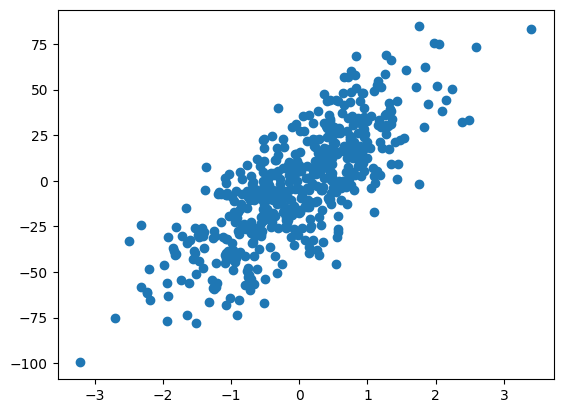

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
import numpy as np


class GDRegressor:

    def __init__(self, learning_rate: float, epochs: int, random_state:int =42):
        np.random.seed(42)
        self.m: float = np.random.rand()  # Random value for the slope
        self.b: float = np.random.rand()  # Random value for the intercept
        self.alpha: float = learning_rate
        self.epochs: float = epochs

    def fit(self, X, y):
        # calcualte the b using GD
        X = X.ravel()
        self.n_samples = X.shape[0]
        for _ in range(self.epochs):
            # Calculate the gradients for weights and intercept
            y_pred = self.m * X + self.b
            w_grad = (1 / self.n_samples) * np.dot(X, (y_pred - y))
            b_grad = (1 / self.n_samples) * np.sum(y_pred - y)
            # Update the weights
            self.m -= self.alpha * w_grad
            self.b -= self.alpha * b_grad
        print(self.m, self.b)

    def predict(self, X):
        return self.m * X + self.b

In [ ]:
# Use the GDRegressor class to predict y_pred below
gd = GDRegressor(learning_rate=0.001, epochs=10000)
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)

24.961335856996474 -2.3687175894549144


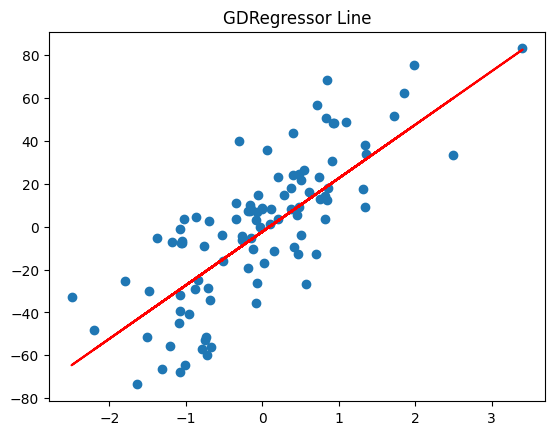

In [ ]:
# Plotting the regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('GDRegressor Line')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5942837995164336

# **Task 3**

**You have to use Polynomail logistic regression class and get the accuracy score of more than 0.75 and also plot the decision boundary in the following**

In [ ]:
df = pd.read_csv('ushape.csv',header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


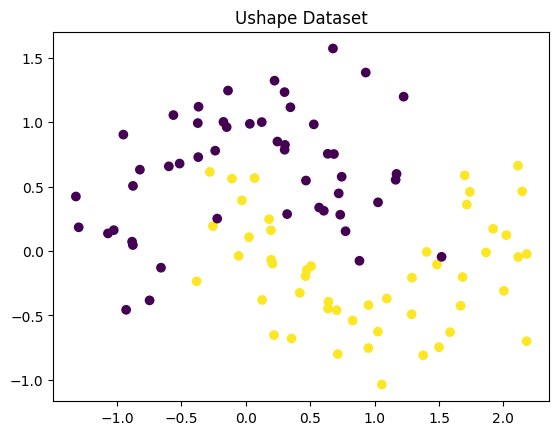

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=2)

plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Ushape Dataset')
plt.show()

In [ ]:


model = LogisticRegression(n_jobs=-1)
transformer = PolynomialFeatures()
pipe = Pipeline([("transformer", transformer), ("model", model)])
param_grid = {
    "model__C": np.arange(0.1, 100, 20),
    "model__max_iter": [1000, 2000, 3000],
    "model__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga","newton-cholesky"],
    "model__class_weight": ["balanced", None],
    "model__multi_class": ["auto", "ovr", "multinomial"],
    "transformer__degree": [2, 3, 4, 5],
    "transformer__interaction_only": [True, False],
}
grid_result = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring=["accuracy", "f1"], refit="accuracy")

############################################################################################################
# Fit the grid search to the data and find the best parameters
# ----------------------------------------------------------------------------------------------------------
# grid_result.fit(X_train, y_train)
# grid_result.best_params_
############################################################################################################

params = {'model__C': 20.1,
 'model__class_weight': 'balanced',
 'model__max_iter': 1000,
 'model__multi_class': 'multinomial',
 'model__solver': 'newton-cg',
 'transformer__degree': 3,
 'transformer__interaction_only': False}

# Set the pipeline with the best parameters
pipe.set_params(**params)

Pipeline(steps=[('transformer', PolynomialFeatures(degree=3)),
                ('model',
                 LogisticRegression(C=20.1, class_weight='balanced',
                                    max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1, solver='newton-cg'))])

Accuracy: 0.96


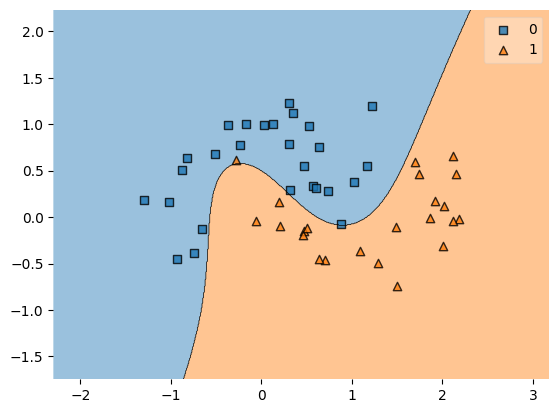

In [ ]:

# I have modified the function to use a pipeline instead of a model and a Feature Generator

def plot_decision_boundary(X,y, pipe_params: dict[str, Union[int,str]]=params) -> None:
    # y needs to be integers
    y = y.astype(np.int64)
    model = LogisticRegression(n_jobs=-1) # Logistic Regression Model
    transformer = PolynomialFeatures() # Polynomial Feature Generator
    pipe = Pipeline([("transformer", transformer), ("model", model)]) # Create a pipeline
    pipe.set_params(**pipe_params) # Set the parameters of the pipeline
    pipe.fit(X,y)
    accuracy = np.mean(cross_val_score(pipe,X,y,scoring='accuracy',cv=10))
    print(f"Accuracy: {accuracy}")
    # Continue the code to plot the decision boundary
    plot_decision_regions(X,y,pipe)
    plt.show()


plot_decision_boundary(X_test,y_test)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.96|



# **Task 4**

**4. In this task you have to write a perceptron algorithm. Than on a dataset apply adaboost classifier by GridSearchCV. Code for plotting the decision boundary is already given**

In [ ]:
def plot_decision_boundary(clf, model_name: str = "Adaboost Classifier", ax=None) -> None:
    X, y = make_circles(n_samples=500, factor=0.1, noise=0.2, random_state=42)
    plotter = None
    if ax is None:
        plotter = plt
        plotter.figure(figsize=(6, 4))
    else:
        plotter = ax
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plotter.contourf(xx1, xx2, y_hat, alpha=0.2)
    plotter.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    if ax is None:
        plotter.title(f"{model_name} Decision Boundary")
        plotter.show()
    else:
        plotter.set_title(f"{model_name} Decision Boundary")

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
class Perceptron:

    def __init__(self, learning_rate: float = 0.01, max_iter: int = 1000):
        self.alpha: float= learning_rate
        self.max_iter: int = max_iter
        # Weights and bias
        self.weights = None
        self.bias = None
        self.error_log = []

    def activation(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, 0)

    def fit(self, X: np.ndarray, y: np.ndarray):
        # Add a column of ones to X
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.max_iter):
            error = 0
            for idx, x_i in enumerate(X):
                # print(x_i.shape)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0.0, 1, 0)
                update = self.alpha * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                error += int(update != 0.0)
            self.error_log.append(error)

In [ ]:
model = Perceptron(learning_rate=0.1, max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.96|



Average Perceptron Accuracy  = `0.491`

<h4 style="color:black;background-color:lightyellow">Vanilla Adaboost Classifier - Baseline Performance</h4>

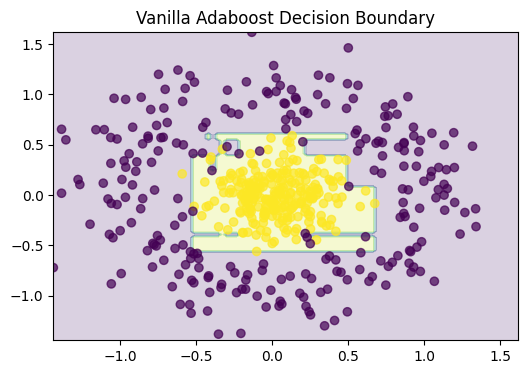

In [ ]:
vanilla_model =  AdaBoostClassifier(random_state=19)
vanilla_model.fit(X_train, y_train)
y_pred = vanilla_model.predict(X_test)
plot_decision_boundary(vanilla_model, "Vanilla Adaboost")


#### Param Grid

In [ ]:
param_grid = {
    # 'estimator': [DecisionTreeClassifier(random_state=42)],
    # 'estimator__criterion': ['gini', 'log_loss'],
    'n_estimators': np.arange(40, 100, 5),
    'learning_rate': np.linspace(0.5, 2, 20),
    'algorithm': ['SAMME',],
    'random_state': [42]
}

In [ ]:
# Code for adaboost classifier
model = AdaBoostClassifier(random_state=42)

# Complete the code to get the best score and best parameters
grid_result = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring=['accuracy','balanced_accuracy'], refit='balanced_accuracy', return_train_score=False)
grid_result.fit(X_train, y_train)
y_pred = grid_result.predict(X_test)

Best: 0.959754 using {'algorithm': 'SAMME', 'learning_rate': 1.3684210526315788, 'n_estimators': 70, 'random_state': 42}
Accuracy Score on test data: 0.9828571428571429


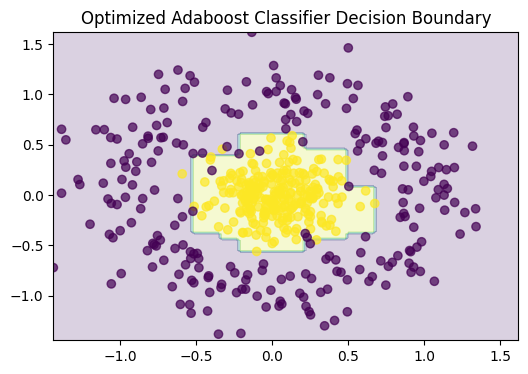

In [ ]:
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # define grid_result from your side
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred)}")
plot_decision_boundary(grid_result, "Optimized Adaboost Classifier")

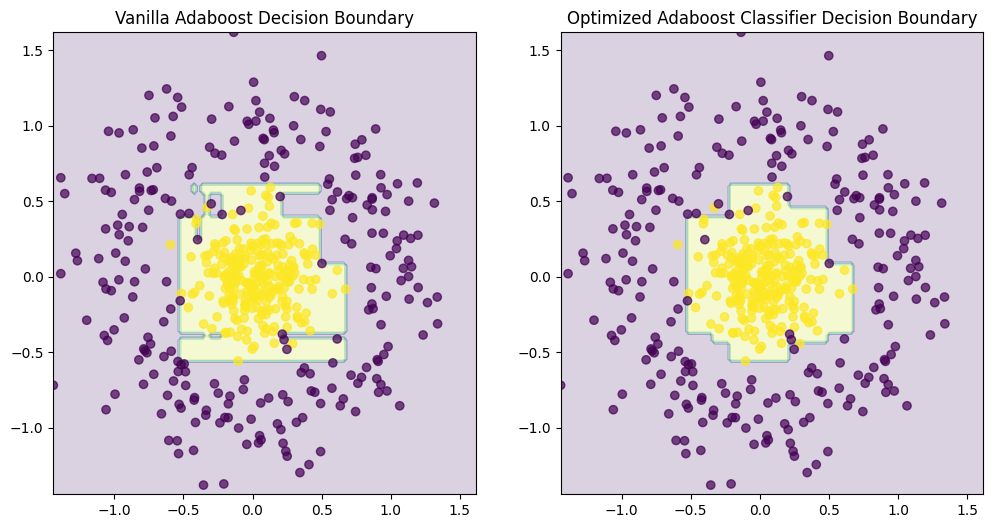

In [ ]:
# Side By Side Comparison of the two models
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundary(vanilla_model, "Vanilla Adaboost", ax[0])
plot_decision_boundary(grid_result, "Optimized Adaboost Classifier", ax[1])
plt.show()

# **Task 5**

**5. You have to use different ML models to classify the Flowers from a common dataset iris. Models to be used are :- Logistic Regression, Support Vector Machine, KNN and Naive Bayes**

**Accuracy should be more than 90% in all the models. Also you have to do the filteration and data cleaning if required, this is a complete prediction model task.**

**Add some plots of the data to showcase your approach**

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


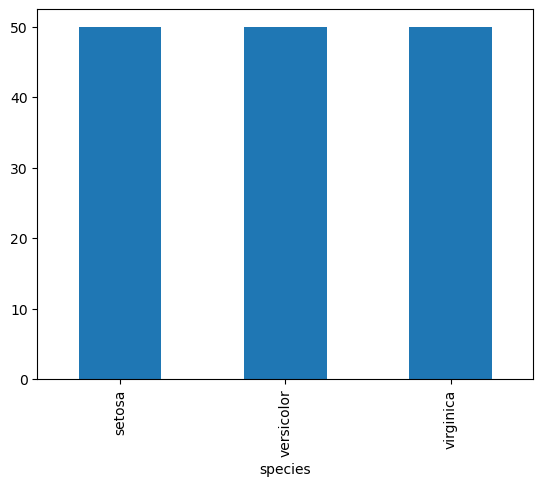

In [ ]:
iris['species'].value_counts().plot(kind='bar')
plt.show()

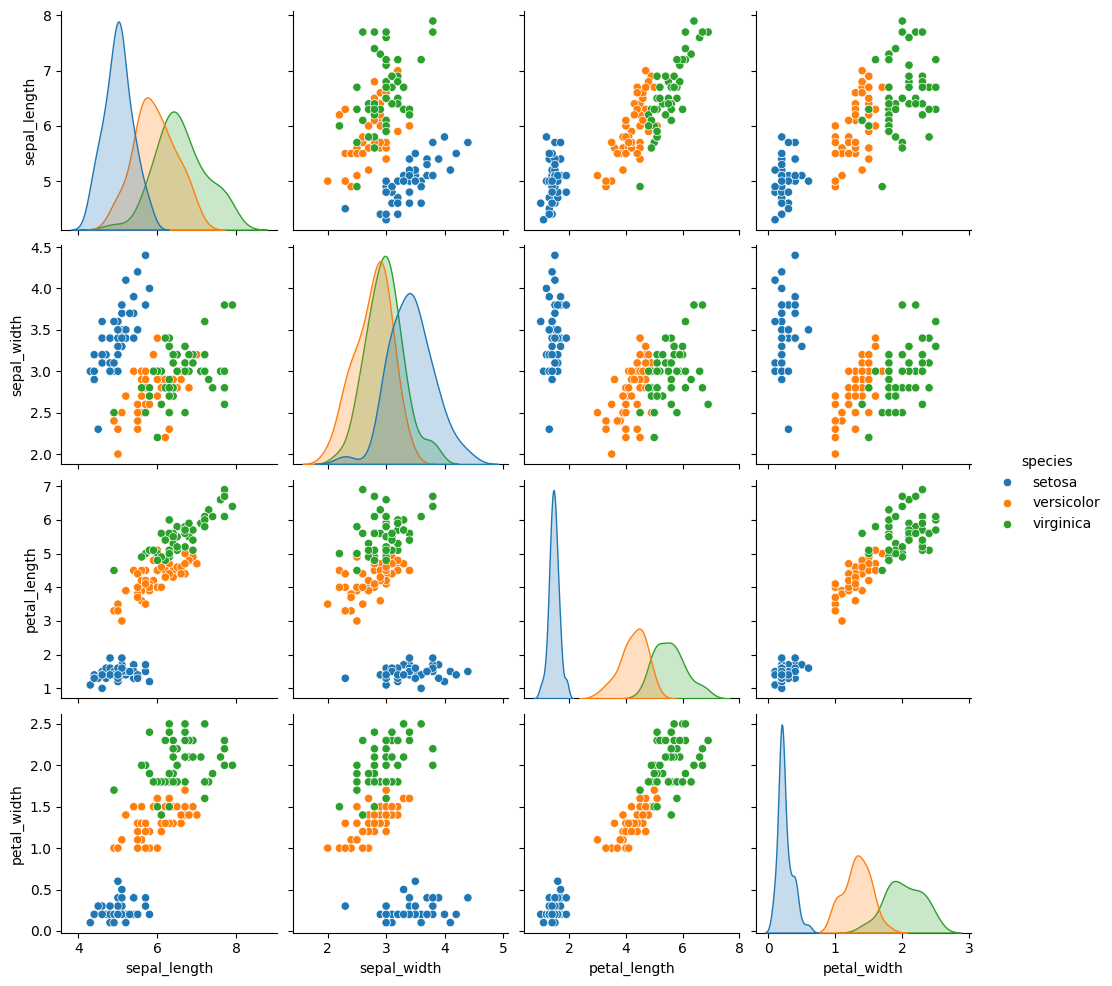

In [ ]:
# Draw a pair plot for the species
sns.pairplot(iris, hue='species')
plt.show()

##### Feature Transform and Label Encoding

In [ ]:
# Split the dataset for training and testing
label_encoder = LabelEncoder()
X = iris.drop(columns="species")
y = iris["species"]
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

In [ ]:
# Feature Transformers

norm = Normalizer()
min_max = MinMaxScaler()
scaler = StandardScaler()

**Logistic Regressoin Model**

Accuracy Score on test data: 0.99


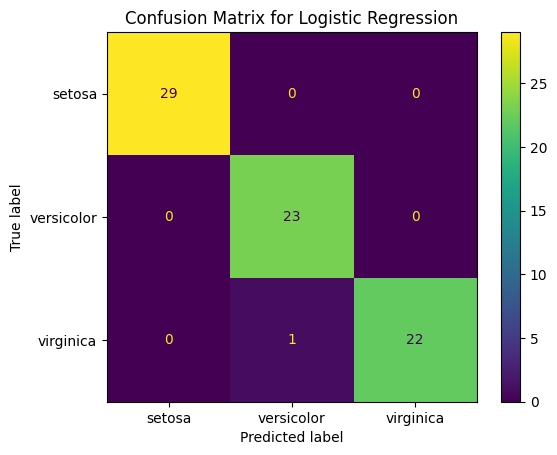

In [ ]:
# Use the Model, display accuracy score and Confusion matrix

model = LogisticRegressionCV(
    Cs=20,
    cv=5,
    # random_state=42,
    max_iter=10000,
    n_jobs=-1,
    penalty="elasticnet",
    solver="saga",
    l1_ratios=[0.1, 0.5, 0.9],
    class_weight="balanced",
)
pipe = make_pipeline(scaler, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=label_encoder.classes_)
cm_display.plot()
plt.title("Confusion Matrix for Logistic Regression")
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}")


**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.986|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix}
\\
\\
\begin{bmatrix}
0 & 23 & 0 \\
\end{bmatrix}
\\
\\
\begin{bmatrix}
0 & 1 & 22 \\
\end{bmatrix}
\end{bmatrix}
$$





**Support Vector Machine**

Accuracy Score on test data: 0.97


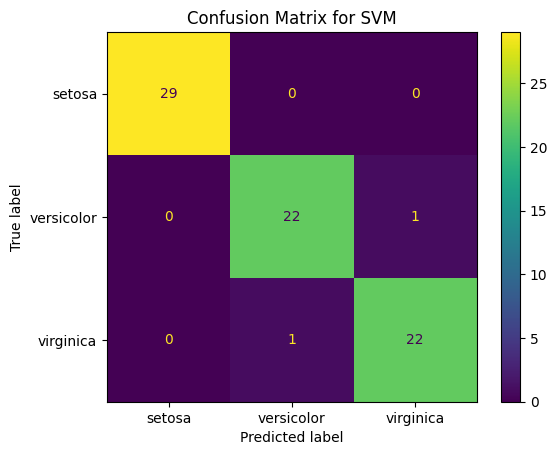

In [ ]:
# Use the Model, display accuracy score
model = svm.SVC()
# param_grid = {
#     "clf__C": np.linspace(0.1, 1000, 10),
#     "clf__gamma": [1, 0.5, 0.1, 0.01, 0.001],
#     "clf__kernel": ["rbf", "poly", "sigmoid"],
#     "clf__class_weight": ["balanced", None],
#     "clf__random_state": [42],
#     # 'clf__degree': [2, 3, 4, 5],
# }
# pipe = Pipeline(steps=[("scaler", scaler), ("clf", model)])
# grid = GridSearchCV(
#     pipe,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring=["accuracy", "balanced_accuracy"],
#     refit="balanced_accuracy",
#     return_train_score=False,
# )
# grid.fit(X_train, y_train)
# best_params  = grid.best_params_
# Remove clf__ from the keys in the best_params dictionary
# best_params = {k.replace("clf__", ""): v for k, v in best_params.items()}
best_params = {
    "C": 777.8,
    "gamma": 0.001,
    "class_weight": "balanced",
    "kernel": "rbf",
    "random_state": 42,
}
model = svm.SVC(**best_params)
pipe = make_pipeline(scaler, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=label_encoder.classes_)
cm_display.plot()
plt.title("Confusion Matrix for SVM")
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}")

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.973|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix}
\\
\begin{bmatrix}
0 & 22 & 1 \\
\end{bmatrix}
\\
\begin{bmatrix}
0 & 1 & 22 \\
\end{bmatrix}
\end{bmatrix}
$$



**Use KNN**

Accuracy Score on test data: 0.96


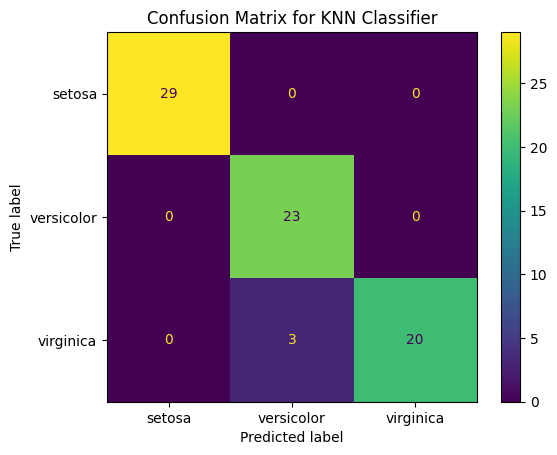

In [ ]:
# Use the Model, display accuracy score
"""
Parameter Search
"""
# model = KNeighborsClassifier(n_jobs=-1)
# param_grid = {
#     'n_neighbors': np.arange(1, 21),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': np.arange(10, 51, 10),
#     'p': [1, 2],
# }
# grid = GridSearchCV(
#     model,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring=["accuracy", "balanced_accuracy"],
#     refit="balanced_accuracy",
#     return_train_score=False,
# )
# grid.fit(X_train, y_train)
# best_params = grid.best_params_
model = KNeighborsClassifier(n_jobs=-1)
best_params = {
    "algorithm": "auto",
    "leaf_size": 10,
    "n_neighbors": 12,
    "p": 1,
    "weights": "uniform",
}
best_params = {
    "algorithm": "auto",
    "leaf_size": 10,
    "n_neighbors": 17,
    "p": 2,
    "weights": "uniform",
}
model = KNeighborsClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix, display_labels=label_encoder.classes_
)
cm_display.plot()
plt.title("Confusion Matrix for KNN Classifier")

print(
    f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}"
)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.96|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix}
\\
\begin{bmatrix}
0 & 23 & 1 \\
\end{bmatrix}
\\
\begin{bmatrix}
0 & 3 & 20 \\
\end{bmatrix}
\end{bmatrix}
$$



**Use Naive Bayes**

Accuracy Score on test data: 0.97


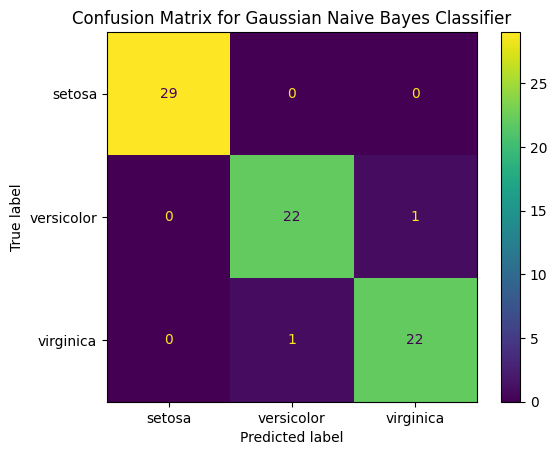

In [ ]:
# Use the Model, display accuracy score
from sklearn.naive_bayes import GaussianNB
"""
Parameter Search
"""
# model = GaussianNB()
# pipe = Pipeline(steps=[("scaler", scaler), ("clf", model)])
# param_grid = {
#     "clf__var_smoothing": np.logspace(0, -9, num=100),
# }
# grid = GridSearchCV(
#     pipe,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring=["accuracy", "balanced_accuracy"],
#     refit="balanced_accuracy",
#     return_train_score=False,
# )
# grid.fit(X_train, y_train)
# best_params = grid.best_params_
best_params = {'var_smoothing':  0.03511191734215131}
model = GaussianNB(**best_params)
pipe = make_pipeline(scaler, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix, display_labels=label_encoder.classes_
)
cm_display.plot()
plt.title("Confusion Matrix for Gaussian Naive Bayes Classifier")

print(
    f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}"
)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.973|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix}
\\
\begin{bmatrix}
0 & 22 & 1 \\
\end{bmatrix}
\\
\begin{bmatrix}
0 & 1 & 22 \\
\end{bmatrix}
\end{bmatrix}
$$



# **Task 6**

**You are given a dataset containing images of different animals (e.g., cats, dogs, birds). Your task is to build a convolutional neural network (CNN) model to classify these images into their respective categories.**

**You have to use CIFAR-10 dataset whose code is present below. You need to show the performce of your model after each epochs**

The output from one such model is present below using 10 epochs

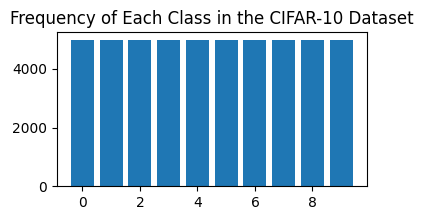

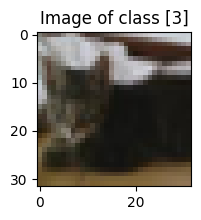

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

unique, freq = np.unique(train_labels.ravel(), return_counts=True)
plt.figure(figsize=(4,2))
plt.bar(unique, freq)
plt.title("Frequency of Each Class in the CIFAR-10 Dataset")
plt.show()
# Get the first image from the training set.
image = train_images[9]
label = train_labels[9]
# Display the image.
plt.figure(figsize=(2,2))
plt.imshow(image,)
plt.title(f"Image of class {label}")
plt.show()

##### Data Preprocessing, Augmentation and Label Encoding

In [ ]:
## Image Preprocessing and Data Generation

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# # Label Encoding to Categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)


# Data Augmentation
img_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
img_generator.fit(train_images)
batch_size = 64
train_data = img_generator.flow(train_images, train_labels, batch_size=batch_size)



##### Launch Tensorboard

In [ ]:
%load_ext tensorboard

### Small Resnet

In [ ]:
# Define your architecture here
# [Source](https://keras.io/guides/functional_api/)

import keras
from keras import layers



inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="resnet_basic")
model.summary()

Model: "resnet_basic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)          │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 30, 30, 32)     │            896 │ img[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 28, 28, 64)     │         18,496 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 9, 9, 64)       │              0 │ conv2d_8[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 9, 9, 64)       │         36,928 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 9, 9, 64)       │         36,928 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 9, 9, 64)       │              0 │ conv2d_10[0][0],       │
│                           │                        │                │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 9, 9, 64)       │         36,928 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 9, 9, 64)       │         36,928 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 9, 9, 64)       │              0 │ conv2d_12[0][0],       │
│                           │                        │                │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 64)             │              0 │ conv2d_13[0][0]        │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │         16,640 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10)             │          2,570 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 223,242 (872.04 KB)

 Trainable params: 223,242 (872.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Standard Convolutional Neural Network for Image Classification with
# Three Convolutional Layers, Max Pooling, and Two Dense Layers
# 3x3 CNN filters with ReLU activation
# 2x2 Max Pooling
# 64 Neurons in the Dense Layer
# 10 Output Neurons for the 10 Classes

# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10)
# ])


In [ ]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0003
    return lrate


# Complie your model here if using keras api
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.8, patience=2, min_lr=1e-4
)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="./logs")
checkpoint_filepath = 'checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks = [reduce_lr, tensorboard,model_checkpoint_callback]
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"],
)

In [ ]:
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
# Model training
history = model.fit(
    train_data,
    epochs=100,
    callbacks=callbacks,
    validation_data=(test_images, test_labels),
)
# model = keras.models.load_model('resnet-cifar10.keras')


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.2345 - loss: 1.9690 - val_accuracy: 0.4302 - val_loss: 1.4950 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4619 - loss: 1.4475 - val_accuracy: 0.5752 - val_loss: 1.1689 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.5524 - loss: 1.2317 - val_accuracy: 0.6176 - val_loss: 1.0403 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6009 - loss: 1.1151 - val_accuracy: 0.6133 - val_loss: 1.0980 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.6332 - loss: 1.0343 - val_accuracy: 0.6617 - val_loss: 0.9617 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.6620 - loss: 0.9582 - val_accuracy: 0.7102 - val_loss: 0.8373 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6

In [ ]:
model.save('resnet-cifar10.keras')

In [ ]:
# Evalate your model to print the acuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Accuracy: {test_acc}")
print(f"Loss: {test_loss}")

313/313 - 1s - 3ms/step - accuracy: 0.8433 - loss: 0.4932
Accuracy: 0.8432999849319458
Loss: 0.4931706488132477


313/313 - 1s - 2ms/step - accuracy: 0.8433 - loss: 0.4932
Accuracy: 0.8432999849319458
Loss: 0.4931706488132477


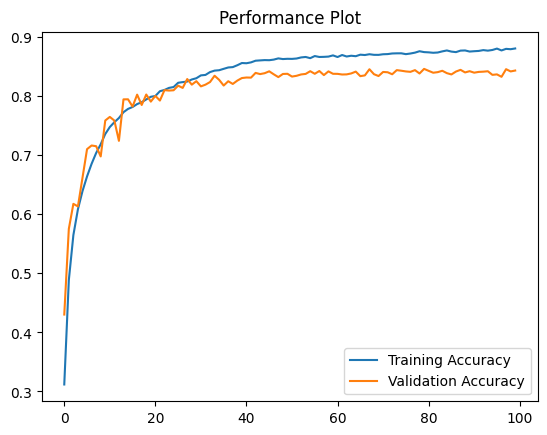

In [ ]:

# Evalate your model to print the acuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Accuracy: {test_acc}")
print(f"Loss: {test_loss}")


# Plot the performace of your model by line graph in each epoch
# get epoch perf from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Performance Plot
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Performance Plot")
plt.show()


# **Task 7**

**You are given a dataset containing text reviews (e.g., movie reviews, product reviews). Your task is to build a recurrent neural network (RNN) model to perform sentiment analysis on these reviews, i.e., classify them into positive or negative sentiment categories.**

**You have to use imdb dataset whose code is present below. You need to show the performce of your model after each epochs**

**To refere about the RNN and sentiment analysis:-** https://www.tensorflow.org/tutorials/keras/text_classification

The output from one such model is present below using 5 epochs

In [ ]:
# IMDb movie review dataset
num_words = 10000  # Number of most frequent words to keep
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Pad sequences to ensure uniform length
max_length = 256
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Define RNN architecture
model = Sequential([
    Embedding(num_words, 128, input_length=max_length),
    keras.layers.Bidirectional(LSTM(64,return_sequences=True)),
    keras.layers.Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 301s 382ms/step - accuracy: 0.6567 - loss: 0.6127 - val_accuracy: 0.7324 - val_loss: 0.5285
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 419ms/step - accuracy: 0.8216 - loss: 0.4084 - val_accuracy: 0.8424 - val_loss: 0.3858
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 311s 398ms/step - accuracy: 0.8949 - loss: 0.2779 - val_accuracy: 0.8496 - val_loss: 0.3613
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 344s 441ms/step - accuracy: 0.9323 - loss: 0.1905 - val_accuracy: 0.8432 - val_loss: 0.4165
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 341s 436ms/step - accuracy: 0.9517 - loss: 0.1428 - val_accuracy: 0.8509 - val_loss: 0.3771


In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [ ]:
model.save('bilstm-imdb.keras')

782/782 - 69s - 88ms/step - accuracy: 0.8509 - loss: 0.3771
Accuracy: 0.8509200215339661
Loss: 0.3770507872104645


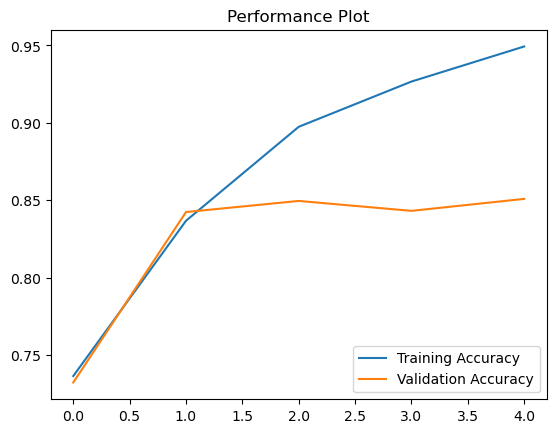

In [ ]:
# Evalate your model to print the acuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy: {test_acc}")
print(f"Loss: {test_loss}")


# Plot the performace of your model by line graph in each epoch
# get epoch perf from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Performance Plot
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Performance Plot")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Define a ResNet model
def create_resnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(
        include_top=False, weights='imagenet', input_shape=input_shape
    )
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=base_model.input, outputs=output)
    return model

# Create and compile the model
model = create_resnet_model(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.1**(epoch / 30))

# Train the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/100
782/782 [==============================] - 3475s 4s/step - loss: 1.4956 - accuracy: 0.0960 - val_loss: 2.5454 - val_accuracy: 0.1453 - lr: 0.0010
Epoch 2/100
637/782 [=======================>......] - ETA: 10:09 - loss: 1.1391 - accuracy: 0.1002